# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
alpaca_api_key = str(alpaca_api_key)
alpaca_secret_key = str(alpaca_secret_key)

In [4]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [8]:
eth_json = requests.get(eth_url).json()
btc_json = requests.get(btc_url).json()

In [9]:
btc_json

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18550400,
   'total_supply': 18550400,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 18659.07,
     'volume_24h': 31493756907,
     'market_cap': 346133186654,
     'percentage_change_1h': 0.393410955295793,
     'percentage_change_24h': 0.113438806057707,
     'percentage_change_7d': 14.2848055148958,
     'percent_change_1h': 0.393410955295793,
     'percent_change_24h': 0.113438806057707,
     'percent_change_7d': 14.2848055148958}},
   'last_updated': 1606001981}},
 'metadata': {'timestamp': 1606001981,
  'num_cryptocurrencies': 1416,
  'error': None}}

In [10]:
btc_price = btc_json['data']['1']['quotes']['USD']['price']
btc_price

18659.07

In [11]:
eth_json

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 113523514,
   'total_supply': 113523514,
   'max_supply': 0,
   'quotes': {'USD': {'price': 542.38,
     'volume_24h': 17510732990,
     'market_cap': 61350568704,
     'percentage_change_1h': 0.5941895125376,
     'percentage_change_24h': 6.66284582301838,
     'percentage_change_7d': 13.953042552463,
     'percent_change_1h': 0.5941895125376,
     'percent_change_24h': 6.66284582301838,
     'percent_change_7d': 13.953042552463}},
   'last_updated': 1606001917}},
 'metadata': {'timestamp': 1606001917,
  'num_cryptocurrencies': 1416,
  'error': None}}

In [12]:
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
eth_price

542.38

In [13]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22390.88
The current value of your 5.3 ETH is $2874.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = str(alpaca_api_key)
alpaca_secret_key = str(alpaca_secret_key)

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
from datetime import datetime
startdate = datetime.fromisoformat('2020-11-20')

# Format current date as ISO format
today = pd.Timestamp(startdate, tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(tickers, timeframe, start = today).df

# Preview DataFrame
ticker_data


AGG                                     SPY  \
                             open    high     low   close   volume   open   
2020-11-20 00:00:00-05:00  118.19  118.34  118.13  118.29  5496191  357.5   

                                                             
                             high     low   close    volume  
2020-11-20 00:00:00-05:00  357.72  355.25  355.34  47947194

In [17]:
# Pick AGG and SPY close prices
agg_close_price = round(ticker_data[tickers[0]]['close'][0], 2)
spy_close_price = round(ticker_data[tickers[1]]['close'][0], 2)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.29
Current SPY closing price: $355.34


In [18]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17767.00
The current value of your 200 AGG shares is $23658.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [my_btc_value+my_eth_value, my_agg_value+my_spy_value]

df_savings = pd.DataFrame(savings_data, columns=['Amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,25265.498
shares,41425.000


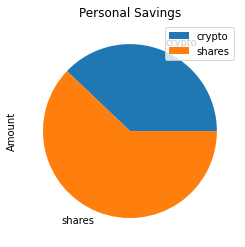

In [20]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Personal Savings');

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f"You have more than enough money, ${total_savings} to be precise. Treat yoself!")
elif total_savings == emergency_fund:
    print("you have exactly 3 Months saved up.")
else:
    print(f"Stop treating yoself, you need to save $" + str(emergency_fund - total_savings) + ".")

You have more than enough money, $66690.49799999999 to be precise. Treat yoself!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = api.get_barset(
    tickers, 
    timeframe, 
    start = start_date,
    end = end_date
).df


# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(portfolio_data = df_stock_data, weights = [.4, .6], num_simulation = 500, num_trading_days = 252*30)

In [25]:
# Printing the simulation input data
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994689,0.994643,1.006778,0.982349,1.004412,0.995580,0.998025,0.993491,1.003296,1.009847,...,0.996312,0.988557,0.994676,1.005203,1.010027,1.007302,0.996963,0.988553,1.000313,1.001936
2,0.999652,0.999675,0.993358,0.986321,1.005325,0.993954,1.001737,0.998128,0.988293,1.001752,...,0.990175,0.984047,0.988971,0.996310,1.022884,1.011938,0.997404,0.990546,0.996052,1.006311
3,0.996734,1.001274,0.996759,0.986764,0.986232,1.014337,0.993012,1.005967,0.991504,1.005458,...,0.991525,0.978856,0.988973,0.994740,1.019635,1.009559,0.988536,0.991019,1.005620,0.991875
4,0.998878,1.004286,0.990535,0.976651,0.963678,1.008074,0.992184,1.008387,0.987773,1.004810,...,0.996620,0.990703,1.005255,0.990331,1.020714,1.016203,0.997468,0.991714,1.020643,0.986489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.849619,9.500724,8.225339,28.428096,6.235615,6.793544,9.010113,10.256902,10.889902,7.005282,...,14.490219,12.974455,11.333825,13.847957,14.500207,52.011335,16.375015,4.417684,21.627298,11.245318
7557,5.827761,9.563279,8.325564,28.469119,6.310355,6.766203,8.947445,10.322790,10.950956,7.000160,...,14.537409,12.898993,11.328314,13.821261,14.567663,51.859251,16.374845,4.395299,21.745975,11.302185
7558,5.860766,9.551258,8.262040,28.423386,6.326995,6.760918,8.862618,10.282800,10.962626,7.009309,...,14.639687,12.908555,11.277081,13.951664,14.425483,52.153803,16.456077,4.386868,21.767528,11.341454
7559,5.893202,9.624326,8.234468,28.386125,6.392902,6.778093,8.840107,10.222376,11.003087,7.025608,...,14.637570,12.797941,11.486499,13.958479,14.461232,52.341075,16.613855,4.406511,21.761269,11.483587


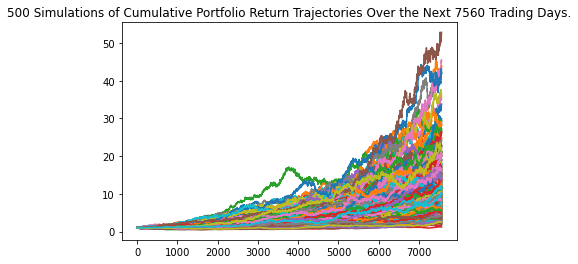

In [26]:
# Plot simulation outcomes
MC_PLOT = MC_thirty_year.plot_simulation()

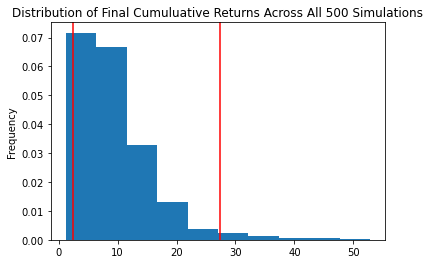

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              9.847858
std               6.805741
min               1.225509
25%               5.242637
50%               8.454743
75%              11.940691
max              52.836478
95% CI Lower      2.379374
95% CI Upper     27.312116
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[-2] * initial_investment,2)
ci_upper = round(summary[-1] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47587.49 and $546242.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[-2] * initial_investment,2)
ci_upper = round(summary[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71381.23 and $819363.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_five_year = MCSimulation(portfolio_data = df_stock_data, weights = [.2, .8], num_simulation = 500, num_trading_days = 252*5)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.974217,1.002144,0.982490,1.010318,0.994593,0.998819,0.988839,0.985038,1.013509,0.990738,...,1.013917,0.987886,1.003007,0.995607,1.011962,1.008926,0.982780,1.011269,0.993536,1.003915
2,0.959321,1.002195,0.976812,0.998204,1.007024,0.994985,0.982391,0.996704,1.023458,0.992301,...,1.011393,1.003975,0.992981,1.015249,1.001663,1.025303,0.980380,1.013626,1.006395,1.000564
3,0.952203,0.996320,0.970465,1.006965,1.012848,1.000572,0.984181,1.003339,1.029341,0.982135,...,1.027849,0.998856,0.998771,1.011722,0.998360,1.028747,0.968304,0.999888,1.011213,1.008041
4,0.958101,1.000563,0.978830,1.010800,1.015667,0.988629,0.982578,1.005797,1.042798,0.991325,...,1.028738,0.991968,1.003862,1.018999,0.971398,1.017317,0.965807,1.016729,1.010326,1.002340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.348118,1.041175,2.092589,2.809766,3.562545,1.716271,1.653351,1.801394,1.492541,2.018642,...,1.268458,1.822206,2.490957,1.297759,1.952008,1.718140,0.602363,2.519077,1.602146,0.966971
1257,1.328891,1.037191,2.119247,2.811265,3.623849,1.724534,1.657222,1.795178,1.473474,2.027912,...,1.278566,1.834270,2.470891,1.301139,1.961151,1.703028,0.598115,2.547736,1.615555,0.982725
1258,1.322745,1.031739,2.122150,2.785214,3.572994,1.712317,1.654738,1.768529,1.461967,2.028449,...,1.262442,1.834136,2.528509,1.299099,1.943508,1.688044,0.602667,2.573149,1.647290,0.990135
1259,1.289959,1.040064,2.122091,2.751930,3.535994,1.723242,1.662279,1.757430,1.463896,2.008694,...,1.266679,1.796295,2.528279,1.284848,1.954397,1.678575,0.612003,2.589021,1.624712,1.005350


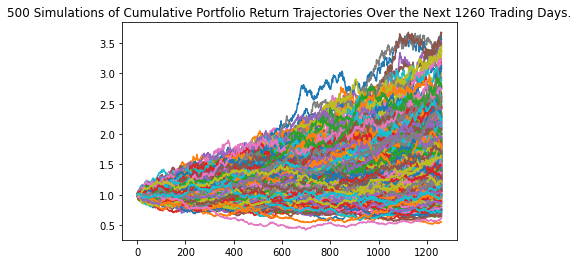

In [33]:
# Plot simulation outcomes
mc_five_year_plot = MC_five_year.plot_simulation()

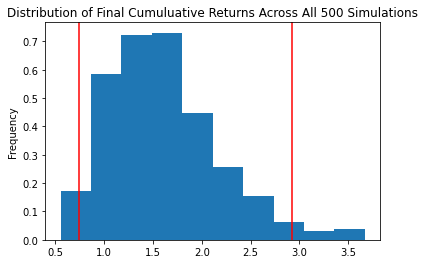

In [34]:
# Plot probability distribution and confidence intervals
mc_five_year_distplot = MC_five_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_year_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(MC_five_year_tbl)

count           500.000000
mean              1.609417
std               0.554007
min               0.551802
25%               1.218621
50%               1.549692
75%               1.885786
max               3.671377
95% CI Lower      0.738523
95% CI Upper      2.920024
Name: 1260, dtype: float64


In [36]:
# Set initial investment
investment_10000 = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_five_year_tbl[-2] * investment_10000,2)
ci_upper_five = round(MC_five_year_tbl[-1] * investment_10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $7385.23 and $29200.24


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(portfolio_data = df_stock_data, weights = [.5, .5], num_simulation = 100, num_trading_days = 252*10)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998775,0.999824,1.002141,0.999459,0.995776,1.005802,1.008173,1.010503,0.994737,0.998754,...,1.010283,0.995377,0.996734,0.999184,1.000333,0.997030,1.005527,1.004469,0.999018,1.005768
2,0.984773,1.006433,1.002998,0.990608,0.997444,1.001194,1.000326,1.014314,1.001751,0.989549,...,1.008551,1.001408,0.997523,0.994292,1.004941,0.996306,1.011685,1.005245,1.003151,1.005584
3,0.982336,1.006036,1.016087,0.988568,0.993394,0.997648,1.002805,1.007793,1.004875,0.987586,...,1.005482,0.999613,0.998769,0.995552,0.995774,0.995086,1.009082,1.000259,1.009013,0.999692
4,0.977909,0.999365,1.025443,0.984880,0.977591,1.004279,1.000897,0.999126,1.015184,0.986193,...,1.012033,0.996934,0.993922,1.005677,0.989501,0.994206,1.021091,1.000323,1.000631,1.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.439457,2.300270,1.415745,2.605227,1.236835,2.164573,1.305916,1.562113,1.216397,2.325353,...,1.368167,1.478088,2.518836,2.705864,2.197126,1.879188,1.085448,1.580740,1.675962,3.317988
2517,1.442519,2.315549,1.411958,2.612435,1.244687,2.166022,1.295201,1.576798,1.215914,2.342317,...,1.368605,1.477459,2.518129,2.712581,2.201341,1.881085,1.084225,1.591285,1.672031,3.290751
2518,1.444079,2.296850,1.414301,2.624517,1.252872,2.158256,1.297173,1.579588,1.206076,2.338974,...,1.366005,1.479826,2.512215,2.711124,2.200248,1.879490,1.081467,1.593137,1.670809,3.280757
2519,1.434845,2.279601,1.407542,2.609169,1.262074,2.158242,1.285304,1.576823,1.202973,2.354128,...,1.356702,1.507706,2.523999,2.740232,2.186919,1.894196,1.077554,1.608972,1.678197,3.278815


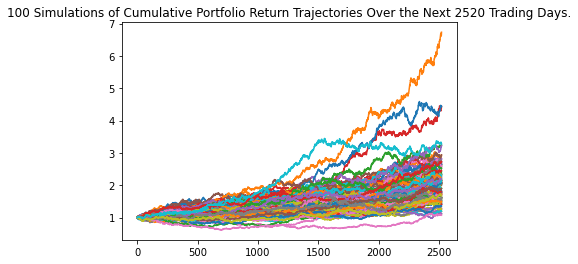

In [43]:
# Plot simulation outcomes
MC_ten_year.plot_simulation()

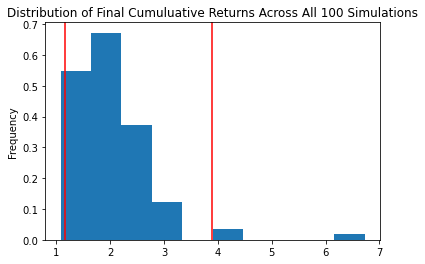

In [44]:
# Plot probability distribution and confidence intervals
MC_ten_year.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_year_tbl = MC_ten_year.summarize_cumulative_return()

print(MC_ten_year_tbl)

count           100.000000
mean              2.076392
std               0.769100
min               1.075802
25%               1.598068
50%               2.040434
75%               2.326235
max               6.731552
95% CI Lower      1.155793
95% CI Upper      3.884884
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment_90000 = 90000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_ten_year_tbl[-2] * initial_investment_90000,2)
ci_upper_ten = round(MC_ten_year_tbl[-1] * initial_investment_90000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_90000} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000 in the portfolio over the next 10 years will end within in the range of $104021.37 and $349639.6
